# Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)      # iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3,1]]
y_pred = per_clf.predict(X_new)

In [2]:
y_pred

array([ True, False])

# Regression MLP

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data,
    housing.target,
    random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full,
    y_train_full,
    random_state=42
)

# MLP
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50],
    random_state=42
)

pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)


In [4]:
rmse

0.5053326657968684

# MLP with keras
## Image classifier with sequential API

In [5]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

2025-11-04 10:35:41.601402: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-04 10:35:47.088440: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-04 10:36:22.269537: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


In [7]:
X_train.shape

(55000, 28, 28)

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
# scaling pixel intensities down to 0-1 range
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.


In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

In [11]:
# creating model using sequential API with 2 hidden layers
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/mnt/Programming/ML/intro_ann/venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
E0000 00:00:1762252596.394960     478 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1762252596.480652     478 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# model's list of layers
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [15]:
# parameters of the layer
weights, biases = hidden1.get_weights()
weights

array([[-0.02116234, -0.02095532, -0.01436803, ...,  0.05280164,
        -0.0270116 , -0.0247478 ],
       [ 0.04571152,  0.02317812,  0.03241239, ...,  0.01488082,
         0.04900157,  0.00127219],
       [ 0.03718092, -0.05921914, -0.04170395, ...,  0.05334066,
        -0.04051429, -0.02771602],
       ...,
       [-0.031466  , -0.05419021, -0.00617861, ...,  0.06945528,
        -0.07026441,  0.0373849 ],
       [ 0.00623164, -0.03488036,  0.05696163, ...,  0.00436083,
         0.05321626,  0.01097687],
       [-0.05928642,  0.02770975,  0.06700788, ...,  0.00420728,
         0.05493632, -0.07101367]], shape=(784, 300), dtype=float32)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
biases.shape

(300,)

### compiling

In [18]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics = ["accuracy"]
)

### training and evaluating the model

In [19]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2025-11-04 10:36:37.816964: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 172480000 exceeds 10% of free system memory.


1718/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6823 - loss: 1.0086

2025-11-04 10:36:43.494526: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 15680000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7669 - loss: 0.7164 - val_accuracy: 0.8300 - val_loss: 0.5044
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8321 - loss: 0.4828 - val_accuracy: 0.8402 - val_loss: 0.4529
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8466 - loss: 0.4369 - val_accuracy: 0.8460 - val_loss: 0.4317
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8560 - loss: 0.4096 - val_accuracy: 0.8502 - val_loss: 0.4152
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8627 - loss: 0.3894 - val_accuracy: 0.8542 - val_loss: 0.4019
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8683 - loss: 0.3736 - val_accuracy: 0.8592 - val_loss: 0.3927
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8719 - loss: 0.3603 - val_accuracy: 0.8610 - val_loss: 0.3841
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8758 - loss: 0.3490 - val_accurac

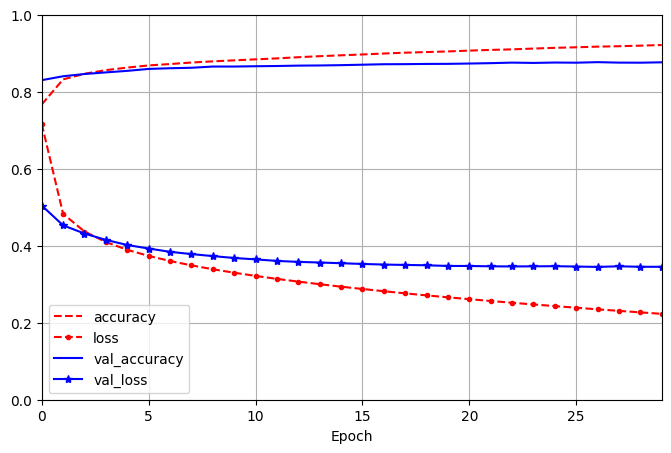

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.","b-", "b-*"]
)
plt.show()

In [21]:
model.evaluate(X_test, y_test)

111/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8806 - loss: 0.3485

2025-11-04 10:38:40.590642: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8776 - loss: 0.3612


[0.3612258732318878, 0.8776000142097473]

### predictions

In [22]:
X_new = X_test[:3]      # using first 3 from test set
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.34, 0.  , 0.01, 0.  , 0.65],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [23]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [24]:
# checking if the predictions are correct or not
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

they are correct indeed

## Regression MLP using Sequential API

In [25]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

/mnt/Programming/ML/intro_ann/venv/lib/python3.13/site-packages/keras/src/layers/preprocessing/data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


2025-11-04 10:38:41.992185: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 172480000 exceeds 10% of free system memory.


1713/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - RootMeanSquaredError: 3.1546 - loss: 10.1123

2025-11-04 10:38:54.370441: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 15680000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - RootMeanSquaredError: 2.9562 - loss: 8.7392 - val_RootMeanSquaredError: 2.9030 - val_loss: 8.4272
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - RootMeanSquaredError: 2.8818 - loss: 8.3048 - val_RootMeanSquaredError: 2.8997 - val_loss: 8.4083
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - RootMeanSquaredError: 2.8778 - loss: 8.2819 - val_RootMeanSquaredError: 2.9003 - val_loss: 8.4115
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - RootMeanSquaredError: 2.8765 - loss: 8.2743 - val_RootMeanSquaredError: 2.8979 - val_loss: 8.3978
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - RootMeanSquaredError: 2.8756 - loss: 8.2693 - val_RootMeanSquaredError: 2.8972 - val_loss: 8.3938
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - RootMeanSquaredError: 2.8750 - loss: 8.2654 - val_RootMeanSquaredError: 2.8971 - val_loss: 8.3932
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - RootMeanSquaredError: 2.

In [26]:
y_pred

array([[[4.448423 ],
        [4.448423 ],
        [4.448423 ],
        [4.448423 ],
        [4.448423 ],
        [4.448423 ],
        [4.448423 ],
        [4.45091  ],
        [4.455384 ],
        [4.466191 ],
        [4.4937696],
        [4.48881  ],
        [4.4980063],
        [4.509501 ],
        [4.5113187],
        [4.5006943],
        [4.4970164],
        [4.495292 ],
        [4.4903355],
        [4.5220275],
        [4.5185647],
        [4.479285 ],
        [4.448423 ],
        [4.448423 ],
        [4.448423 ],
        [4.448423 ],
        [4.448423 ],
        [4.448423 ]],

       [[4.437103 ],
        [4.366081 ],
        [4.381493 ],
        [4.407617 ],
        [4.4127717],
        [4.3985734],
        [4.3968606],
        [4.3903856],
        [4.408356 ],
        [4.381707 ],
        [4.4279537],
        [4.414285 ],
        [4.4127717],
        [4.4127717],
        [4.412652 ],
        [4.411902 ],
        [4.4127717],
        [4.4127717],
        [4.4127717],
        [4.

# Subclassing API to build dynamic models

In [27]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")